In [0]:
import tensorflow as tf
import pandas as pd
import sklearn
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
import tensorflow_datasets as tfds

In [0]:
dataset, info = tfds.load('imdb_reviews/subwords8k', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

In [0]:
training_data=[]
train_label=[]

test_data=[]
test_label=[]

for r,j in train_dataset:
  training_data.append(str(r.numpy()))
  train_label.append(j.numpy())

for r,j in test_dataset:
  test_data.append(str(r.numpy()))
  test_label.append(j.numpy())

training_label=np.array(train_label)
test_label=np.array(test_label)

In [0]:
vocab_Size=10000
embeeding_dim=16
max_length=120
trunk_type='post'
oov_tok='<OOV>'
num_epoch=10

In [0]:
tokenizer=Tokenizer(num_words=vocab_Size,oov_token=oov_tok)
tokenizer.fit_on_texts(training_data)
word_index=tokenizer.word_index
sequences=tokenizer.texts_to_sequences(training_data)
padded=pad_sequences(sequences,maxlen=120,truncating=trunk_type)

In [0]:
testing_sequences = tokenizer.texts_to_sequences(test_data)
testing_padded = pad_sequences(testing_sequences,maxlen=max_length)

In [0]:
def plot_graphs(history, string):
  plt.plot(history.history[string])
  plt.plot(history.history['val_'+string])
  plt.xlabel("Epochs")
  plt.ylabel(string)
  plt.legend([string, 'val_'+string])
  plt.show()

In [0]:
model=tf.keras.Sequential([
         tf.keras.layers.Embedding(vocab_Size,embeeding_dim,input_length=max_length),
        tf.keras.layers.Bidirectional(tf.keras.layers.LSTM(32,return_sequences=True)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Bidirectional(tf.keras.layers.GRU(16)),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(64,activation='relu'),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(1,activation='sigmoid')
])

In [0]:
model.compile(loss='binary_crossentropy',
    optimizer='adam',
    metrics=['accuracy']
)

In [0]:
callbacks=tf.keras.callbacks.EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

In [18]:
history=model.fit(padded,training_label,epochs=num_epoch,callbacks=[callbacks],validation_data=(testing_padded, test_label))

Epoch 1/10
782/782 [==============================] - 104s 133ms/step - loss: 0.5987 - accuracy: 0.6503 - val_loss: 0.4494 - val_accuracy: 0.7858
Epoch 2/10
782/782 [==============================] - 103s 131ms/step - loss: 0.3962 - accuracy: 0.8328 - val_loss: 0.4332 - val_accuracy: 0.7982
Epoch 3/10
782/782 [==============================] - 103s 132ms/step - loss: 0.3172 - accuracy: 0.8744 - val_loss: 0.4387 - val_accuracy: 0.8009
Epoch 4/10
782/782 [==============================] - 103s 131ms/step - loss: 0.2409 - accuracy: 0.9089 - val_loss: 0.5646 - val_accuracy: 0.7818
Epoch 5/10
782/782 [==============================] - 103s 132ms/step - loss: 0.1671 - accuracy: 0.9412 - val_loss: 0.6332 - val_accuracy: 0.7866


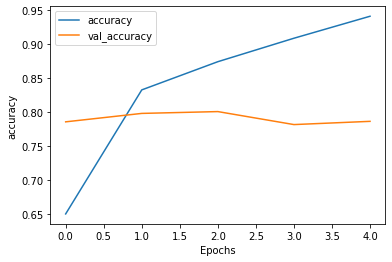

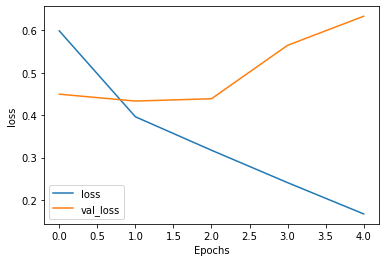

In [19]:
plot_graphs(history, 'accuracy')
plot_graphs(history, 'loss')

In [0]:
import io
vocab_size = 8080
word_index = tokenizer.word_index

reverse_word_index = dict([(value, key) for (key, value) in word_index.items()])
e = model.layers[0]
weights = e.get_weights()[0]


out_v = io.open('vecs.tsv', 'w', encoding='utf-8')
out_m = io.open('meta.tsv', 'w', encoding='utf-8')
for word_num in range(1, vocab_size):
  word = reverse_word_index[word_num]
  embeddings = weights[word_num]
  out_m.write(word + "\n")
  out_v.write('\t'.join([str(x) for x in embeddings]) + "\n")
out_v.close()
out_m.close()